# Import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

# Create a Classification dataset

In [2]:
X, y = make_classification(n_samples=100, n_features=2, n_informative=1, n_redundant=0, n_classes=2, n_clusters_per_class=1, random_state=41, hypercube=False, class_sep=20)

# Scatter Plot of the data

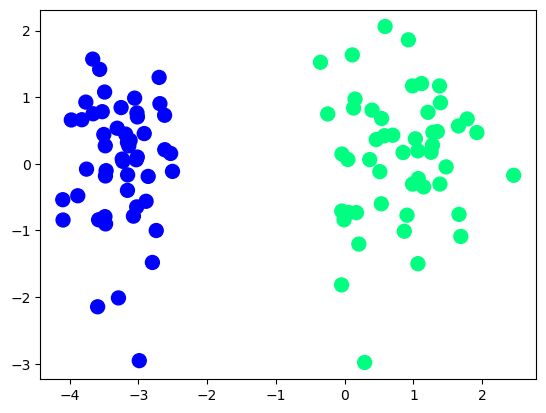

In [3]:
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

# Perceptron From Scratch

In [4]:
def step(x):
    return 1 if x > 0 else 0

In [5]:
def perceptron(X, y):

    # Insert 1's at 0th position in X
    X = np.insert(X, 0, 1, axis=1)

    # Initialize the Coefficients/Weights with 1's
    weights = np.ones(X.shape[1])

    # Setting the learning rate to 0.1 and epochs to 1000
    lr = 0.1
    epochs = 1000

    # Intercept and Coefficents 
    intercept, coefficients = 0, 0
    
    for i in range(epochs):

        # Select a random point
        point = np.random.randint(0, X.shape[0])

        # Calculate y_hat which is dot product of that point and weights
        y_hat = step(np.dot(X[point], weights))

        # Update the weights
        weights = weights + lr * (y[point] - y_hat) * X[point]

    intercept, coefficients = weights[0], weights[1:]

    return intercept, coefficients

In [6]:
intercept_, coef_ = perceptron(X, y)
print('Intercept: ', intercept_)
print('Coefficients: ', coef_)

Intercept:  1.3000000000000003
Coefficients:  [1.05343617 0.2221512 ]


In [7]:
# Ax + By + C = 0 => y = (-C/A)x + (-B/A)
m = - (coef_[0] / coef_[1]) 
b = - (intercept_ / coef_[1])

In [8]:
x_input = np.linspace(-3, 3, 100)
y_input = m * x_input + b

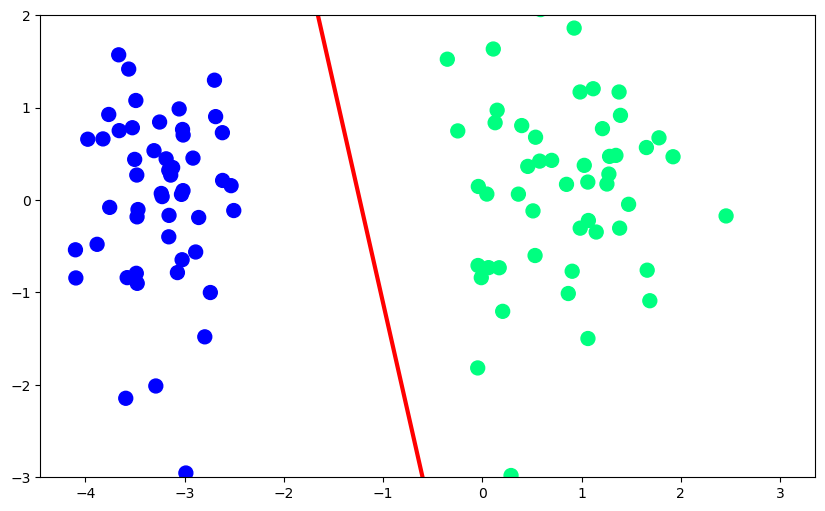

In [9]:
plt.figure(figsize=(10,6))
plt.plot(x_input, y_input, color='red', linewidth=3)
plt.scatter(X[:,0], X[:,1], c=y, cmap='winter', s=100)
plt.ylim(-3,2)
plt.show()

# Sigmoid From Scratch

In [10]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [11]:
def sigmoid_classifier(X, y):

    # Insert 1's at 0th position in X
    X = np.insert(X, 0, 1, axis=1)

    # Initialize the Coefficients/Weights with 1's
    weights = np.ones(X.shape[1])

    # Setting the learning rate to 0.1 and epochs to 1000
    lr = 0.1
    epochs = 1000

    # Intercept and Coefficents 
    intercept, coefficients = 0, 0
    
    for i in range(epochs):

        # Select a random point
        point = np.random.randint(0, X.shape[0])

        # Calculate y_hat which is dot product of that point and weights
        y_hat = sigmoid(np.dot(X[point], weights))

        # Update the weights
        weights = weights + lr * (y[point] - y_hat) * X[point]

    intercept, coefficients = weights[0], weights[1:]

    return intercept, coefficients

In [12]:
intercept_, coef_ = sigmoid_classifier(X, y)
print('Intercept: ', intercept_)
print('Coefficients: ', coef_)

Intercept:  2.9165869926491044
Coefficients:  [2.86500718 0.12306599]


In [13]:
# Ax + By + C = 0 => y = (-C/A)x + (-B/A)
m = - (coef_[0] / coef_[1]) 
b = - (intercept_ / coef_[1])

In [14]:
x_input1 = np.linspace(-3, 3, 100)
y_input1 = m * x_input1 + b

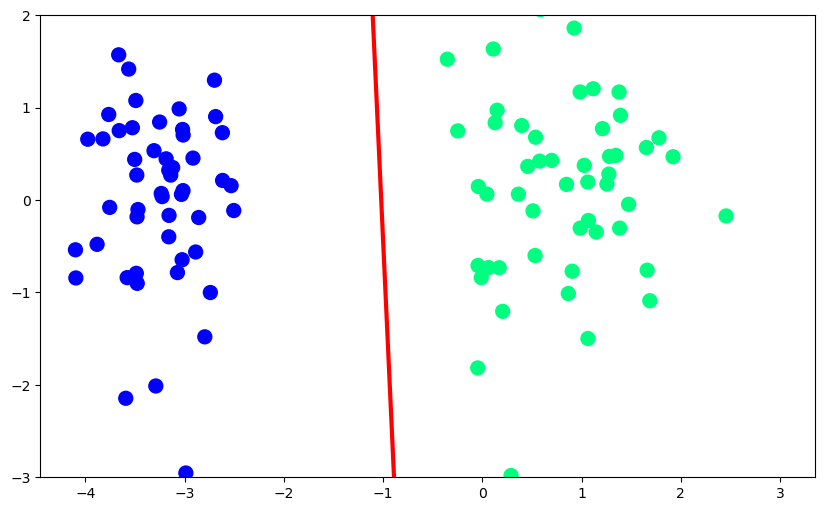

In [15]:
plt.figure(figsize=(10,6))
plt.plot(x_input1, y_input1, color='red', linewidth=3)
plt.scatter(X[:,0], X[:,1], c=y, cmap='winter', s=100)
plt.ylim(-3,2)
plt.show()

# Logistic Regression

In [16]:
lor = LogisticRegression()

In [17]:
lor.fit(X, y)

LogisticRegression()

In [18]:
m = - (lor.coef_[0][0] / lor.coef_[0][1])
b = - (lor.intercept_ / lor.coef_[0][1])

In [19]:
x_input2 = np.linspace(-3,3,100)
y_input2 = m * x_input2 + b

(-3.0, 2.0)

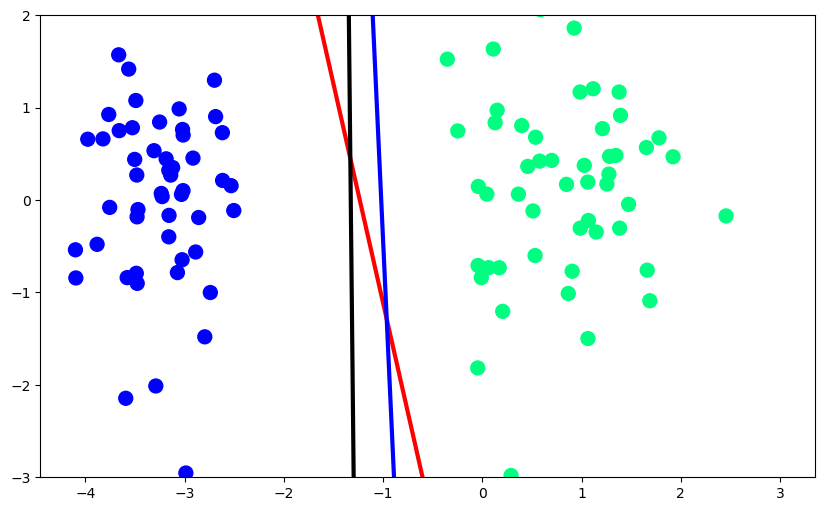

In [21]:
plt.figure(figsize=(10,6))
plt.plot(x_input, y_input, color='red',linewidth=3) # Pereptron
plt.plot(x_input1, y_input1, color='blue',linewidth=3) # Sigmoid
plt.plot(x_input2, y_input2, color='black',linewidth=3) # Logistic Regression
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

# Conclusion

The sigmoid function brings continuity, smoothness, and probabilistic interpretation to the model.
It allows fine-grained updates to the weights, unlike the rigid, all-or-nothing updates in the perceptron.
This leads to a well-balanced, symmetric decision boundary, better convergence, and superior generalization to unseen data.

| Feature              | Without Sigmoid (Perceptron)               | With Sigmoid (Logistic Regression) |
| -------------------- | ------------------------------------------ | ---------------------------------- |
| **Output**           | Hard 0/1 label                             | Smooth probability \[0, 1]         |
| **Update Behavior**  | Only when wrong                            | Always (proportional to error)     |
| **Loss Function**    | Discrete (misclassification)               | Continuous (log loss)              |
| **Decision Surface** | Can be unstable / unsymmetrical            | Stable, smooth, symmetric          |
| **Convergence**      | May not converge if not linearly separable | Always converges (convex loss)     |
| **Generalization**   | Overfits on training data                  | Better performance on test data    |
